##### Concurrency 2023/2024 - Computer Science
## Lecture 1 - Introduction to Quantum Computing using Qiskit

by André Sequeira at andresequeira401@gmail.com

<img src="https://miro.medium.com/max/2400/0*yUz39magP61kj3MR.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">


## Contents
1. [Postulates of quantum mechanics](#postulates)
   * [State space](#statespace)
   * [Evolution](#evolution)
   * [Measurement](#Measurement)
   * [Composite systems](#composite)
3. [Single-qubit gates](#single_operations)
4. [Multi-qubit gates](#multi_op)

&nbsp;

## 1. Postulates of quantum mechanics <a id='postulates'></a>

### 1.1 State space
Associated with any isolated physical system is a complex vector space with an inner product (Hilbert Space) known as the **state space** of the system.

Hilbert space $$\mathbb{H} - \mathbb{C}^d$$

where $d=2^n$ with $n$ being the number of qubits of our quantum system.
The quantum bit, *qubit*, is the unit of information in a quantum computer. Any quantum system with two orthogonal states can be used to represent a qubit.

<img src="images/bits_qubits.png" alt="alt text" height=300, width="600"/>

The bit can only be in one of the two discrete states. The quantum bit can be in one of the two discrete states **or** any combination of the two states. Quantum computing is linear, thus a superposition, or linear combination of both states is a valid state of the system.

<img src="images/superposition.png" alt="alt text" height=350, width="500"/>

This means that the qubit can actually be in any combination of 0 and 1. For instance, a qubit can be 70% 0 and 30% 1, kinda... Qubits are not the same as probabilistic bits, why? Because they can have complex amplitudes that could interfere!

Actually, many people say that this is the power of quantum computing, but, only to an extent. **Superposition state is not a probabilistic mixture, both states happen at the same time**, but the real power of quantum computers come from physical processes like **interference** and **entanglement** which are impossible to recreate classically.

&nbsp;
### Dirac notation<a id='bra_ket'></a>

The bra–ket notation is a standard notation for describing quantum states.

- A *ket* $|u\rangle$ is a column vector, while a *bra* $\langle v |$ is a row vector.

- $| u \rangle$ and $ \langle u|$ are [Hermitian conjugates](https://en.wikipedia.org/wiki/Conjugate_transpose) of each other. 

This notation simplifies the representation of the scalar product of vectors, as well as the action of a linear operator on a vector and other operations over a complex vector space.

<div class="alert alert-block alert-info">
    
**Bra-ket as inner product of vectors**

Consider the ket vector $|u\rangle$  and $|v\rangle$ on a two-dimensional space:

$$
|u\rangle =  
\begin{pmatrix}
1 \\
0
\end{pmatrix};
\;\;
|v\rangle = 
\begin{pmatrix}
0 \\
1
\end{pmatrix};
$$

&nbsp;

Their respective conjugate transpose, $\langle u|$ and $\langle v|$, can be represented as row vectors:

&nbsp;

$$
\langle u| =  
\begin{pmatrix}
1 & 0
\end{pmatrix};
\;\;
\langle v | = 
\begin{pmatrix}
0 & 1
\end{pmatrix};
$$

&nbsp;

The inner product between $\langle v|$ and $|u\rangle$ is represented as $\langle v | u \rangle$:

&nbsp;

$$
\langle v | u \rangle =
\begin{pmatrix}
0 & 1
\end{pmatrix}
\begin{pmatrix}
1 \\
0
\end{pmatrix} = 0 \, ;
$$

&nbsp;

Which indicates that the states are in fact orthogonal, thereby forming a basis in a two-dimensional space.
</div>

States 

$$
|u\rangle =  
\begin{pmatrix}
1 \\
0
\end{pmatrix} = |0\rangle;
\;\;
|v\rangle = 
\begin{pmatrix}
0 \\
1
\end{pmatrix} = |1\rangle;
$$

form the computational basis and a single qubit quantum state is generally described as $|\psi\rangle$ that can be written as a complex superposition of these basis states as:

$$|\psi\rangle = \alpha|0\rangle + \beta |1\rangle = \begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}$$

<img src="images/bloch_sphere.png" alt="alt text" height=400, width="550"/>



In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram, plot_distribution, plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np

**Quantum registers** are used to create qubits. Take into account that the qubit always starts in state $|0\rangle$. 

**Classical registers** are used to measure the state of the qubits i.e. collapse the quantum state into a classical state.

In [2]:
qr = QuantumRegister(1,'q')

cr = ClassicalRegister(1,'c')

A **quantum circuit** is defined by the quantum and classical registers created above

In [3]:
circuit1 = QuantumCircuit(qr,cr, name="qcircuit")

#or without creating the registers explicitly

n_qubits = 1
n_bits = 1
circuit2 = QuantumCircuit(n_qubits,n_bits, name="qcircuit")

We can draw the quantum circuit

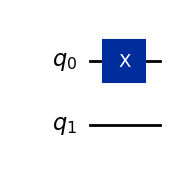

In [34]:
#qr = QuantumRegister(2)

qc = QuantumCircuit(2)

#qc.x(qr[0])
qc.x(0)

qc.draw(output="mpl")

### 1.2 Evolution <a id='evolution'></a>

Usually the evolution of quantum systems is given by an operator $U$ s.t:
$$ |\psi'\rangle = U|\psi\rangle $$
Quantum evolution or operators are **unitary** this means that the computation is reversible because $UU^{\dagger}=I$. 

A gate acting on a single qubit is represented by a $2\times 2$ unitary matrix $U$ that can have complex entries. Evolution thus happens by linear algebra, simple matrix vector multiplication.

The most used single-qubit gates are the **Pauli gates** : 

$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}
;
\quad
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}
;
\quad
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}
$$


##### <span style="color: red;">EXERCISE 1:</span> - Apply the Pauli matrices to the basis states (on paper) and verify what states come out.


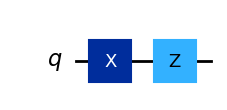

In [36]:
# create the circuit for every Pauli matrix

qc = QuantumCircuit(1)

#inicialmente o qiskit parte do estado |0> 

qc.x(0)

qc.z(0)



qc.draw(output="mpl")   



One of the most important single-qubit gates is the Hadamard gate, responsible for creating a *uniform* superposition state.

$$
H   =  \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}
$$

##### <span style="color: red;">EXERCISE 2:</span> - Apply the Hadamard matrix to the computational basis states and see how state changes. If we apply two Hadamards consecutively, what state do we get  ? 


##### <span style="color: red;">EXERCISE 3:</span> - What state do we get if we apply the following gates $H X |0\rangle$ ? 

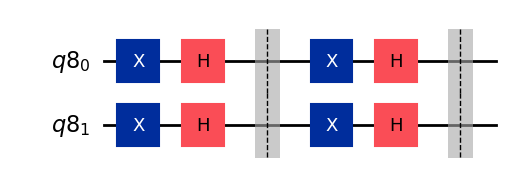

In [42]:
#create circuit 

'''
qc = QuantumCircuit(1)

qc.x(0)
qc.h(0)

qc.draw(output="mpl")
'''

'''
#2 qubits 

qr = QuantumRegister(2)

qc = QuantumCircuit(qr)

qc.x(qr)
qc.h(qr)
#qc.x(1)
#qc.h(1)

qc.draw(output="mpl")
'''
def circuit(n,L):
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr)

    for i in range(L):
        qc.x(qr)
        qc.h(qr)
    
        qc.barrier()
        
    return qc


qc = circuit(2,2)
qc.draw(output="mpl")

In [ ]:
#or
 
'''
qr = QuantumRegister(2)

qc = QuantumCircuit(qr)

qc.x(qr)
qc.h(qr)

qc.draw(output="mpl")'''

#or for n qubits and L layers

'''
def circuit(n,L):
    qr = QuantumRegister(n)
    qc = QuantumCircuit(qr)

    for i in range(L):
        qc.x(qr)
        qc.h(qr)
    
    return qc

qc = circuit(2,2)

qc.draw(output="mpl")
'''

### 1.3 Measurement

#### Execute using the qasm_simulator 

A measurement is composed by **projective operators** - measurements in the computational basis.

$$ M_0 = |0\rangle \langle 0| $$
$$ M_1 = |1\rangle \langle 1| $$

If the state of the system is an arbitrary state $|\psi\rangle$, then the probability of measuring each basis state $i$ is given by:

$$ P_i = \langle \psi| M_i | \psi\rangle $$ 
Thus, for an arbitrary superposition state $|\psi\rangle = \alpha|0\rangle + \beta |1\rangle$, we measure each basis state with probability:

$$p_0 = |\alpha|^2$$

$$p_1 = |\beta|^2$$

##### <span style="color: red;">EXERCISE 4:</span> - Prove that the probabilities of measuring each basis state are indeed what is represented above 

We can execute the circuit in two different ways:
* **state vector simulator** - Results the exact quantum state i.e the vector of complex amplitudes.
* **Sampler** - Returns the quantum states measured after executing the circuit several times. Number of **shots**. 

In [6]:
from qiskit.quantum_info import Statevector

In [47]:
qc = QuantumCircuit(1)

qc.x(0)
qc.h(0)

#try other states

sv = Statevector.from_instruction(qc)

print(sv)



Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


Import the visualization tools:

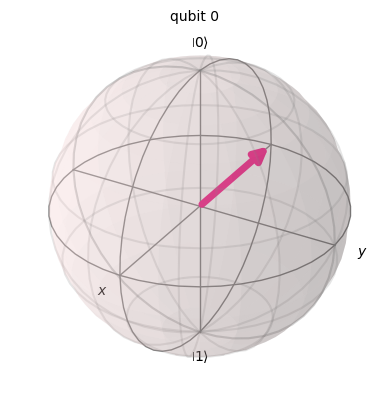

In [48]:
plot_bloch_multivector(sv)

### Execute the quantum circuit with the sampler

For this we need to measure the quantum circuit in the computational basis.

In [9]:
from qiskit.primitives import Sampler

In [53]:
qc = QuantumCircuit(1)

qc.x(0)


qc.measure_all()

options = {"shots": 10000}

sampler = Sampler(options=options)
    
job = sampler.run(qc)
result = job.result()  

print(result)


SamplerResult(quasi_dists=[{1: 1.0}], metadata=[{'shots': 10000}])


#### Plotting the probabilitites of measuring each basis state

{1: 1.0}


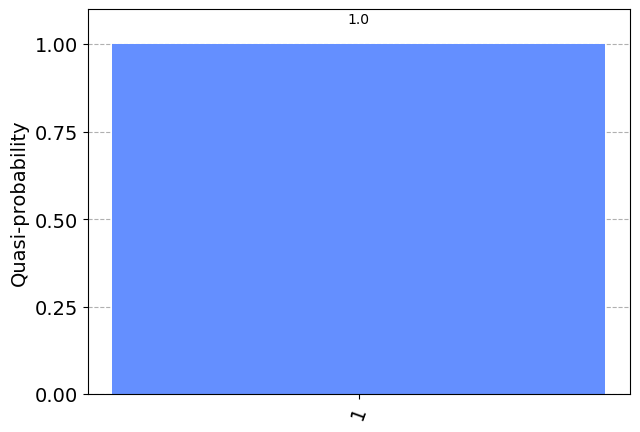

In [54]:
probability_dictionary = result.quasi_dists[0] #gets probability of each state measured in decimal
#or
#probability_dictionary = result.quasi_dists[0].binary_probabilities() #gets probability of each binary string measured in a dictionary 

print(probability_dictionary)

plot_histogram(probability_dictionary)

##### <span style="color: red;">EXERCISE 5:</span> - Get the histogram of the probabilities of measuring each basis state in the uniform superposition state.


In [57]:
# your code here

qc = QuantumCircuit(1)

qc.h(0)

qc.measure_all()

options = {"shots": 100000}

sampler = Sampler(options=options)
    
job = sampler.run(qc)
result = job.result()  

print(result)



SamplerResult(quasi_dists=[{0: 0.49875, 1: 0.50125}], metadata=[{'shots': 100000}])


{0: 0.49875, 1: 0.50125}


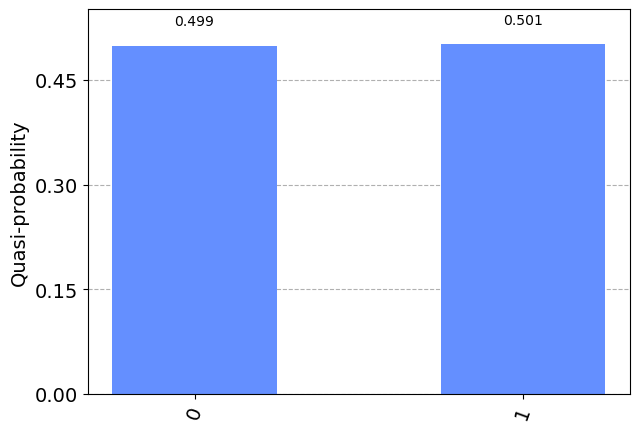

In [58]:
probability_dictionary = result.quasi_dists[0] #gets probability of each state measured in decimal
#or
#probability_dictionary = result.quasi_dists[0].binary_probabilities() #gets probability of each binary string measured in a dictionary 

print(probability_dictionary)

plot_histogram(probability_dictionary)

##### <span style="color: red;">Question:</span> - Why don't we get a uniform distribution ?

### Note on qiskit ordering of qubits 

Qiskit uses little-endian , left qubit is the most significant . Important for easy binary to decimal conversion. 

<p align="center">
  <img width="650" height="400" src="images/littleendian.png">
</p>


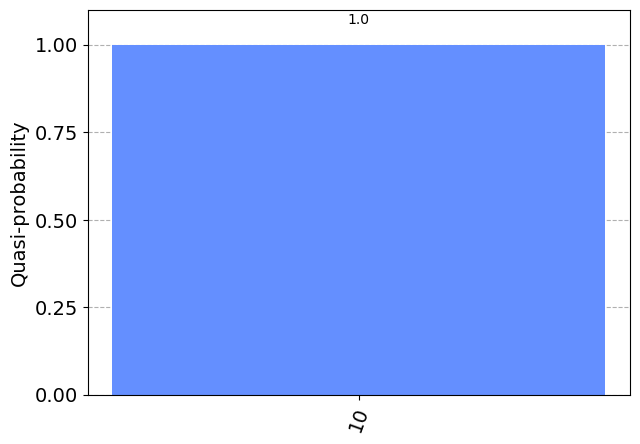

In [62]:
qc = QuantumCircuit(2)

#prepare the state |10> 
qc.x(0)

qc.measure_all()

qc = qc.reverse_bits()

options = {"shots": 1024}

sampler = Sampler(options=options)

job = sampler.run(qc)
result = job.result()

probability_dictionary = result.quasi_dists[0].binary_probabilities() #gets probability of each state measured in a dictionary

plot_histogram(probability_dictionary)

#### We can actually reverse the order of qubits if we want to start programming from the top qubit using 

```python
circuit.reverse_bits()
```

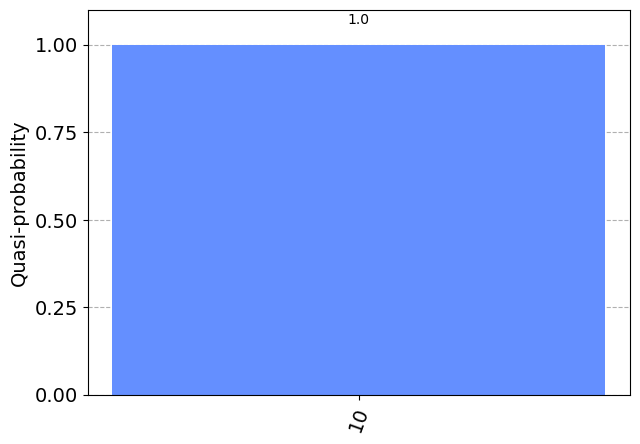

In [16]:
qc = QuantumCircuit(2)

#prepare the state |10>


qc.x(0)

qc.measure_all()

options = {"shots": 1024}

sampler = Sampler(options=options)

job = sampler.run(qc)
result = job.result()

probability_dictionary = result.quasi_dists[0].binary_probabilities() #gets probability of each state measured in a dictionary

plot_histogram(probability_dictionary)

#### High level function for executing the circuit

In [2]:
from qiskit import *
from qiskit.primitives import Sampler
from qiskit.quantum_info import Statevector

import numpy as np

def execute_circuit(qc, shots=1024, binary=False, mode="sampler", reverse=False):
    
    if reverse:
        qc = qc.reverse_bits()
        
    if mode == "sampler":
    
        options = {"shots": shots}
        sampler = Sampler(options=options)
        
        job = sampler.run(qc)
        result = job.result()  
        
        probability_dictionary = result.quasi_dists[0]

        if binary:
            return probability_dictionary.binary_probabilities()
        else:
            return probability_dictionary
    
    else:
        #remember that for statevector measurements are not needed
        sv = Statevector.from_instruction(qc)
        return sv


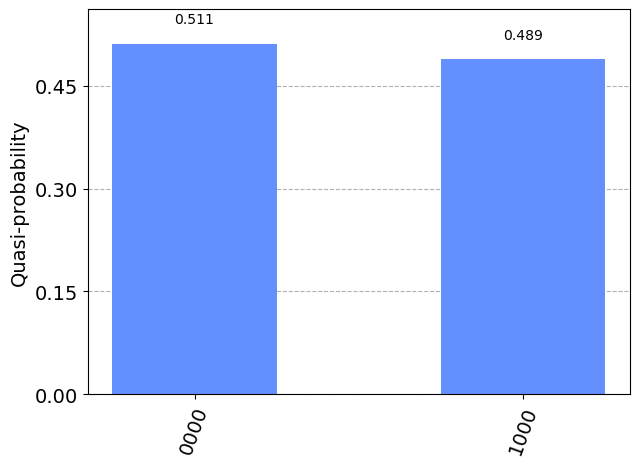

In [66]:
#create the state psi = 1/sqrt(2) |0000> + 1/sqrt(2) |1000> and test sampler and statevector
qc = QuantumCircuit(4)

qc.h(0)

qc.measure_all()

dictn = execute_circuit(qc, shots=1024, binary=True, mode="sampler", reverse=True)

plot_histogram(dictn)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


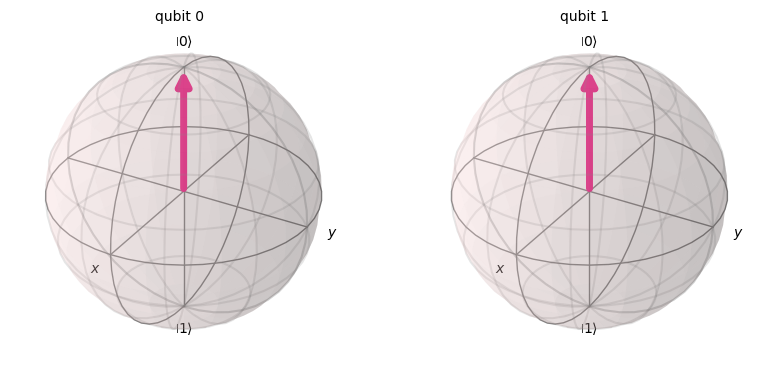

In [70]:
#statevector for the uniform superposition of 2 qubits


qc = QuantumCircuit(2)

sv = execute_circuit(qc, mode="statevector")

print(sv)

plot_bloch_multivector(sv)

##### <span style="color: red;">Question:</span> Why do need the sampler ?


##### <span style="color: red;">EXERCISE 5:</span>
Program a quantum circuit for each of the pauli gates applied to the zero state and execute the circuit using sampler. 

What happens to the probabilities of our system once we apply these gates?

In [ ]:
### YOUR CODE HERE ###

qc = QuantumCircuit(1)


### 1.4 Composite systems <a id="composite"></a>

Recall that multi qubit states are represented via the tensor product:

$$
|q_0\rangle \otimes |q_1\rangle =  |q_0\rangle |q_1\rangle = |q_0 q_1\rangle
$$

&nbsp;



The joint-state description can be written in bra-ket notation, with the tensor product providing an algebraic description of the state.

&nbsp;

$$|q_a q_b\rangle = |q_a\rangle \otimes |q_b\rangle = 
\begin{pmatrix}
q_{a1} \\ 
q_{a2}
\end{pmatrix} \otimes
\begin{pmatrix}
q_{b1} \\ 
q_{b2}
\end{pmatrix} =
\begin{pmatrix}
q_{a1}.q_{b1} \\
q_{a1}.q_{b2} \\
q_{a2}.q_{b1} \\
q_{a2}.q_{b2}
\end{pmatrix}
$$

&nbsp;

Using the tensor product, we can determine the vector of an $n$-qubit basis state. For example:

&nbsp;

$$|10\rangle = |1\rangle \otimes |0\rangle = 
\begin{pmatrix}
0 \\ 
1
\end{pmatrix} \otimes
\begin{pmatrix}
1 \\ 
0
\end{pmatrix} = 
\begin{pmatrix}
0 \\ 
0 \\
1 \\
0
\end{pmatrix}
$$
</div>

The tensor product is used to derive multi qubit gates as well. 
&nbsp;

### Entanglement and Bloch sphere for multi-qubit states

&nbsp;

Since qubits can be entangled, multi-qubit states, in general, cannot be expressed by simply representing each qubit's Bloch sphere. This is because the dimension of the vector space rises exponentially with the number of qubits, to account for correlation between qubits. One attempt to visualize multi-qubit states is made [here](https://medium.com/qiskit/visualizing-bits-and-qubits-9af287047b28). 

**For a quantum system, its description is more than the sum of descriptions for each individual qubit.**

For instance, the superposition over two qubits is **not** an entangled state:

$$ |\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$

However, a Bell state **cannot** be decomposed by the state of individual qubits.

$$ |\psi\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$



##### <span style="color: red;">EXERCISE 6:</span>
Prepare the superposition over n qubits


In [ ]:
n_qubits = 5
qc = QuantumCircuit(n_qubits)


Why dont we have a perfect uniform superposition state ? 2^5 = 32 states. Recall that with n qubits we can represent a superposition over 2^n possible states

## 2 Single-qubit gates <a id='single_op'></a>

(Let qr being the quantum register and qc being the quantum circuit.)


|Gate Name|Syntax |Matrix|      
|-|-|-|
|Identity |qc.id(qr)|  $Id = \begin{bmatrix} 1&0\\0&1 \end{bmatrix}$|
|Bit-flip or Pauli-X| qc.x(qr)| $ X = \begin{bmatrix} 0&1\\1&0 \end{bmatrix}$|
|Bit and phase-flip or Pauli-Y| qc.y(qr)|$ Y = \begin{bmatrix} 0&-i\\i&0 \end{bmatrix}$|
|Phase-flip or Pauli-Z| qc.z(qr)| $Z = \begin{bmatrix} 1&0\\0&-1 \end{bmatrix}$|
|Hadamard|qc.h(qr)| $ H =\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1\end{bmatrix}$|
|S or $\sqrt{Z}$-Phase|qc.s(qr)|$ S =\begin{bmatrix} 1 & 0 \\ 0 & i\end{bmatrix}$|
|$S^\dagger$ or conjugate $\sqrt{Z}$-Phase|qc.sdg(qr)| $S^\dagger =\begin{bmatrix} 1 & 0 \\ 0 & -i\end{bmatrix}$|
|T or $\sqrt{S}$-Phase|qc.t(qr)| $T=\begin{bmatrix}1 & 0 \\ 0 & e^{i \pi /\ 4}\end{bmatrix}$|
|$T^\dagger$ or conjugate $\sqrt{S}$-Phase|qc.tdg(qr)| $ T^\dagger =\begin{bmatrix}1 & 0 \\ 0 & e^{-i \pi /\ 4}\end{bmatrix}$|
|$R_y$ rotation gate |qc.ry(qr)| $ R_y(\theta) = \begin{bmatrix} cos(\frac{\theta}{2}) & -sin(\frac{\theta}{2}) \\ sin(\frac{\theta}{2}) & cos(\frac{\theta}{2})\end{bmatrix}$|
|$R_x$ rotation gate |qc.rx(qr)| $ R_x(\theta) = \begin{bmatrix} cos(\frac{\theta}{2}) & -isin(\frac{\theta}{2}) \\ isin(\frac{\theta}{2}) & cos(\frac{\theta}{2})\end{bmatrix}$|
|$R_z$ rotation gate |qc.rz(qr)| $ R_z(\theta) = \begin{bmatrix} e^{i\frac{\theta}{2}} & -0 \\ 0 & e^{-i\frac{\theta}{2}}\end{bmatrix}$|

##### <span style="color: red;">EXERCISE 8:</span>
Program a quantum circuit that applies a rotation in the y direction to the state $|0\rangle$ of $\theta=\frac{\pi}{2}$. What state do we get ? Execute the circuit using qasm_simulator and plot the histogram


In [78]:
### YOUR CODE HERE ###

qc = QuantumCircuit(1)

qc.ry(np.pi/3 , 0)

qc.measure_all()

sv = execute_circuit(qc, mode="sampler")

#plot_bloch_multivector(sv)


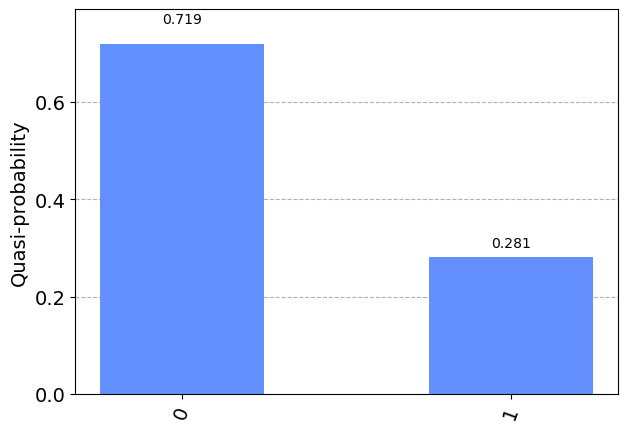

In [79]:
counts = execute_circuit(qc,shots=1024, binary=True, mode="sampler", reverse=False)

plot_distribution(counts)

That means that we can use $R_x$ and $R_y$ to create arbitrary superpositions instead of just uniform

&nbsp;

## 3 Multi-qubit gates <a id='multi_op'></a>

Multiqubit gates:

Let control be the the 0 qubit and the target the 1 qubit.

|Gate Name|Syntax |Matrix|        
|-|-|-|
|Controlled-X or controlled-Not|qc.cx(qr\[control\],qr\[target\])|$CX = \begin{bmatrix}1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\end{bmatrix}$  |
|Controlled-Y|qc.cy(qr\[control\],qr\[target\])|$CY = \begin{bmatrix}1&0&0&0\\0&0&0&-i\\0&0&1&0\\0&i&0&0\end{bmatrix}$   |
|Controlled-Z or controlled-Phase|qc.cz(qr\[control\],qr\[target\])| $CZ =\begin{bmatrix}1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&0&-1\end{bmatrix}$  |
|Controlled-Hadamard|qc.ch(qr\[control\],qr\[target\])|$CH = \begin{bmatrix}1&0&0&0\\0&\frac{1}{\sqrt{2}}&0&\frac{1}{\sqrt{2}}\\0&0&1&0\\0&\frac{1}{\sqrt{2}}&0&-\frac{1}{\sqrt{2}}\end{bmatrix}$  |
|SWAP|qc.swap(qr\[control\],qr\[target\])| $SWAP =\begin{bmatrix}1&0&0&0\\0&0&1&0\\0&1&0&0\\0&0&0&1\end{bmatrix}$  |

&nbsp;

### CNOT gate 

The controlled-NOT (or controlled-$X$) gate allows for the creation of entanglement between two qubits in a quantum circuit. The CNOT gate's action on basis states is to flip, i.e. apply an $X$ gate to, the target qubit (denoted as $\oplus$ in quantum circuits) if the control qubit  (denoted as $\bullet$), is $|1\rangle$; otherwise the target qubit goes unchanged.

The matrix describing a CNOT depends on which qubit acts as control. For a state $|q_1 q_0\rangle$, if we apply a CNOT operation with $q_1$ as control, the matrix is described as:

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}
$$

In [ ]:
qc = QuantumCircuit(2)

qc.cx(1,0)

##### <span style="color: red;">EXERCISE 8:</span>
Prepare the Bell state:

$$ |\psi\rangle = \frac{1}{\sqrt{2}} \biggl( |00\rangle + |11\rangle \biggr) $$

Plot the circuit. Execute the circuit using qasm_simulator.
Why is it an entangled state ? 

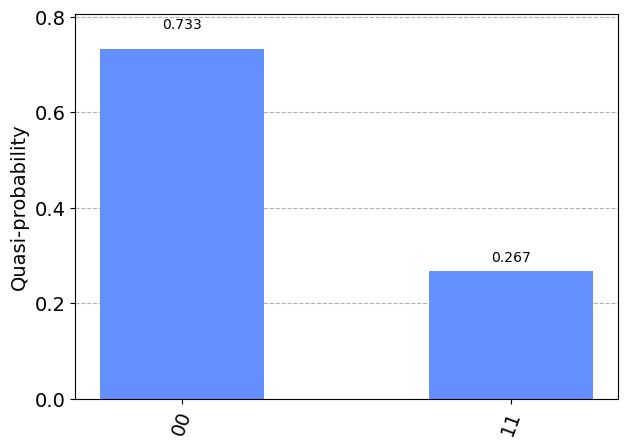

In [83]:
### YOUR CODE HERE ###

qc = QuantumCircuit(2)

qc.ry(np.pi/3, 0)

qc.cx(0,1)

qc.measure_all()


counts = execute_circuit(qc, shots=1024, binary=True, mode="sampler", reverse=True)

plot_distribution(counts)




##### <span style="color: red;">EXERCISE 9:</span>
What state do we get if we apply the following gates ? 

<p align="center">
  <img width="250" height="200" src="images/hhcx.png">
</p>

Plot the circuit. Execute the circuit using qasm_simulator.

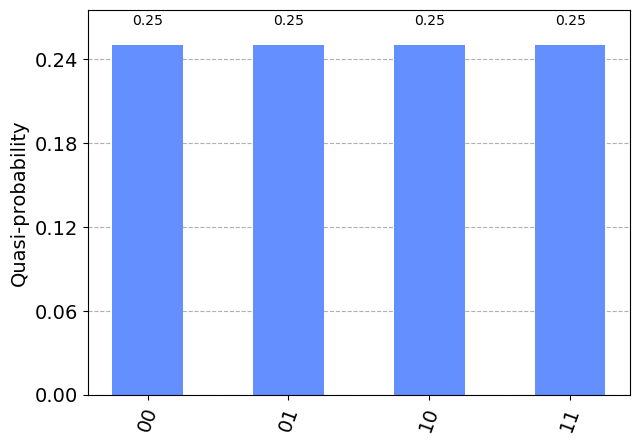

In [85]:
qc = QuantumCircuit(2)

qc.h([0,1])

qc.cx(0,1)

qc.measure_all()

counts = execute_circuit(qc, shots=1000000, binary=True, mode="sampler", reverse=True)

plot_distribution(counts)




##### <span style="color: red;">EXERCISE 10:</span>
Use qiskit to show that we get the same state using each combination of gates.

<p align="center">
  <img width="500" height="200" src="images/cx.png">
</p>

Plot the circuit. Check using the state vector

In [89]:
#first circuit 

qr = QuantumRegister(2)
qc = QuantumCircuit(qr)

qc.h(qr)

qc.cx(qr[0], qr[1])

qc.h(qr)


sv1 = execute_circuit(qc, mode="statevector", reverse=True)

print(sv1)


qc2 = QuantumCircuit(2)

qc2.cx(1,0)

sv2 = execute_circuit(qc2, mode="statevector", reverse=True)

print(sv2)

#second circuit




Statevector([1.00000000e+00+0.j, 6.22328532e-19+0.j, 3.25176795e-17+0.j,
             5.97792087e-34+0.j],
            dims=(2, 2))
Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


### Toffoli gate 

The Toffoli gate is related to the classical AND and XOR operations in classical computing. 

$$
CC_X = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{pmatrix} 
$$


##### <span style="color: red;">EXERCISE 11:</span>
Implement a circuit that applies a hadamard gate to the zero and first qubit, followed by a toffoli gate. Execute the circuit and plot the distribution

In [ ]:
### YOUR CODE HERE ###

qc = QuantumCircuit(3)


qc.ccx(0,1,2)


qc.measure_all()
qc.draw(output="mpl")

In [ ]:
counts = execute_circuit(qc, binary=True, shots=1024, reverse=True)   
plot_distribution(counts)

##### <span style="color: red;">EXERCISE 12:</span>
Phase kickback: Prove that $X|-\rangle = -|-\rangle$.


### Merging Circuits

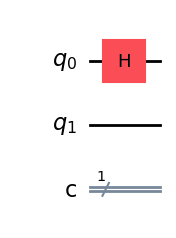

In [3]:
circuit = QuantumCircuit(2,1)
circuit.h(0)
circuit.draw(output='mpl')

In [7]:
circuit_aux = QuantumCircuit(2,1)

circuit_aux.h(0)

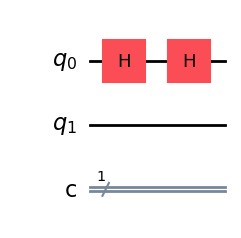

In [8]:
circuit = circuit.compose(circuit_aux)
circuit.draw(output='mpl')